# Generating Paths

#### Imports

In [539]:
import os, sys
import six

[autoreload of src.models.ou failed: Traceback (most recent call last):
  File "C:\Users\pace8\PycharmProjects\Paths-Generation\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\pace8\PycharmProjects\Paths-Generation\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\pace8\PycharmProjects\Paths-Generation\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "C:\Users\pace8\PycharmProjects\Paths-Generation\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pace8\PycharmProjects\Paths-Generation\venv\Lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "C:\Users\pace8\PycharmProje

In [540]:
import numpy as np
import pandas as pd

In [541]:
sys.path.append(os.path.abspath('../'))

In [542]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [543]:
# Import local classes
from src.models.gbm import GeometricBrownianMotion
from src.models.ou import OrnsteinUhlenbeckProcess
from src.models.bridge import BrownianBridge

### Testing the Ornstein Uhlenbeck

In [544]:
ou = OrnsteinUhlenbeckProcess(volatility=0.05, long_term_mean=0.15, mean_reversion=5.0, initial_value=0.050)

<Axes: >

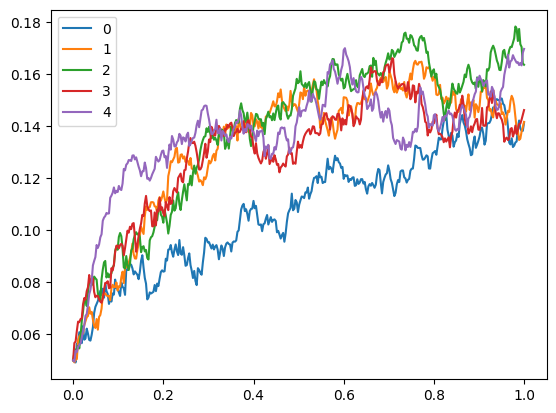

In [545]:
ou_paths = ou.generate(100, regenerate=True)
ou_paths.iloc[:, 0:5].plot()

In [546]:
ou.theoretical_expectation()

0.14932620530009144

In [547]:
ou_paths.iloc[-1, :].mean()

0.1496284311589175

In [548]:
ou.theoretical_std_dev()

0.01581102937880894

In [549]:
ou_paths.iloc[-1, :].std()

0.014721285851312028

### Testing the Geometric Brownian Motion

In [550]:
gbm = GeometricBrownianMotion(volatility=0.25, initial_value=1.0, maturity=1.0, time_intervals=365)

<Axes: >

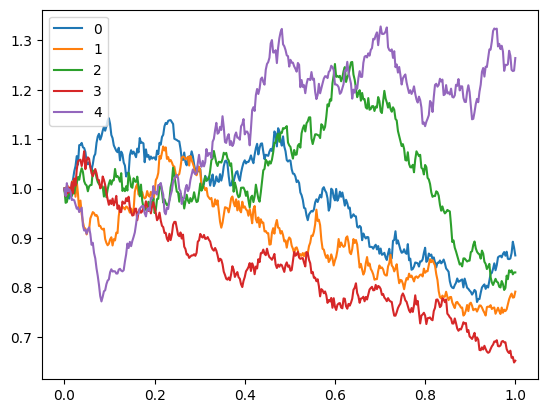

In [562]:
df_gbm = gbm(1000)
df_gbm.iloc[:, 0:5].plot()

In [563]:
np.mean(df_gbm.iloc[-1, :])

0.9895075000541531

In [564]:
gbm.theoretical_expectation()

1.0

In [565]:
df_gbm.iloc[-1, :].std()

0.25452172606700835

In [566]:
gbm.theoretical_std_dev()

0.2539575927548915

### Testing the Brownian Bridge

In [556]:
bb = BrownianBridge(0.25)

In [557]:
paths_bb = bb.generate(1000)

<Axes: >

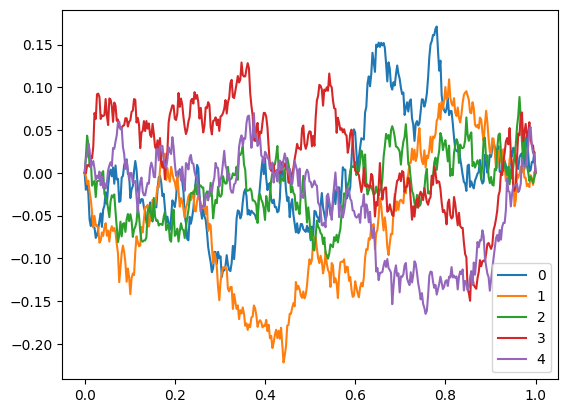

In [558]:
paths_bb.iloc[:, 0:5].plot()

In [559]:
paths_bb.iloc[0,:].mean()

0.0

In [560]:
paths_bb.iloc[-1,:].mean()

0.0

<Axes: >

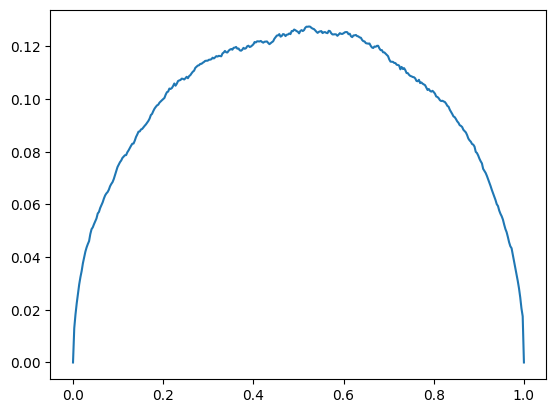

In [561]:
paths_bb.std(axis=1).plot()